In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

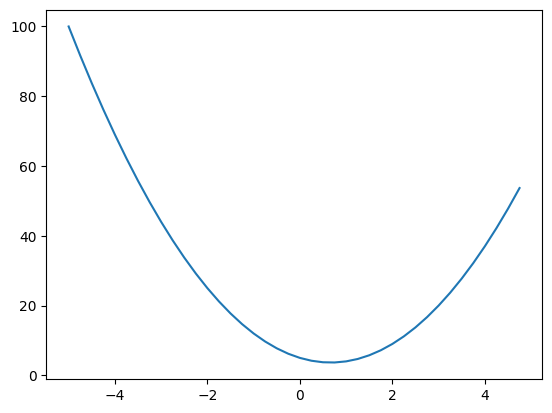

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

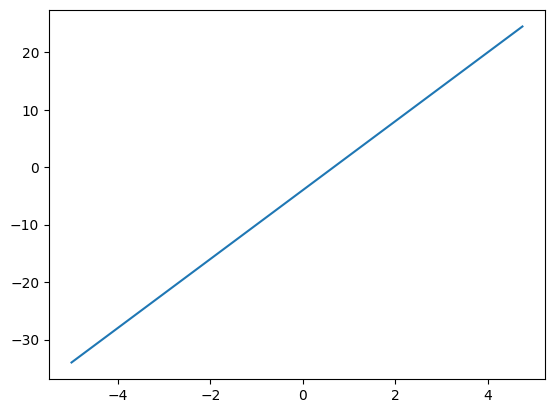

In [11]:
h = 0.0001
xs = np.arange(-5, 5, 0.25)
dfdx = (f(xs + h) - f(xs))/h
plt.plot(xs, dfdx)

In [12]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [17]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c # f(a, b, c)
a += h
d2 = a*b + c # f(a + h, b, c)

(d2 - d1)/h, d2

(-3.000000000010772, 3.999699999999999)

In [31]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        # if not hasattr(other, "data"):
        #     other = Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        # if not hasattr(other, "data"):
        #     other = Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def backward(self):
        pass

    def relu(self):
        pass

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d1 = a*b + c
d1._prev, d1._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [39]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = f"data {n.data:.4f}", shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot


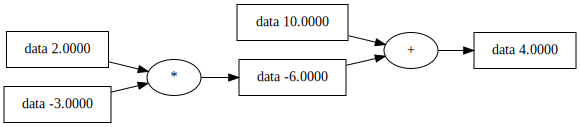

In [40]:
draw_dot(d1)